In [139]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [140]:
#Importing the Data
from google.colab import drive
drive.mount('/content/drive/')
%cd /content/drive/My Drive/'Data Mining Project'

folder=('/content/drive/My Drive/Data Mining Project/')

import os
from google.colab import drive

df = pd.read_csv(folder+'MTA_Congestion_Relief_Zone_Vehicle_Entries__Beginning_2025_20250319.csv',na_values='?')

df.head()

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/My Drive/Data Mining Project


,Toll Date,Toll Hour,Toll 10 Minute Block,Minute of Hour,Hour of Day,Day of Week Int,Day of Week,Toll Week,Time Period,Vehicle Class,Detection Group,Detection Region,CRZ Entries,Excluded Roadway Entries
0,03/08/2025,03/08/2025 11:00:00 PM,03/08/2025 11:50:00 PM,50,23,7,Saturday,03/02/2025,Overnight,"1 - Cars, Pickups and Vans",Brooklyn Bridge,Brooklyn,102,96
1,03/08/2025,03/08/2025 11:00:00 PM,03/08/2025 11:50:00 PM,50,23,7,Saturday,03/02/2025,Overnight,TLC Taxi/FHV,West Side Highway at 60th St,West Side Highway,140,3
2,03/08/2025,03/08/2025 11:00:00 PM,03/08/2025 11:50:00 PM,50,23,7,Saturday,03/02/2025,Overnight,TLC Taxi/FHV,West 60th St,West 60th St,213,0
3,03/08/2025,03/08/2025 11:00:00 PM,03/08/2025 11:50:00 PM,50,23,7,Saturday,03/02/2025,Overnight,TLC Taxi/FHV,Queensboro Bridge,Queens,70,0
4,03/08/2025,03/08/2025 11:00:00 PM,03/08/2025 11:50:00 PM,50,23,7,Saturday,03/02/2025,Overnight,TLC Taxi/FHV,Queens Midtown Tunnel,Queens,132,0


In [141]:
#Cleaning the Data
res = df.columns
print(res)
#dfs = df.drop(['Toll Hour', 'Toll 10 Minute Block', 'Day of Week Int', 'Time Period', 'Excluded Roadway Entries'], axis = 1) #df simple with redundacy and unnecessary columns removed
dfs = df.drop(['Toll Hour', 'Toll 10 Minute Block', 'Day of Week Int', 'Time Period', 'Excluded Roadway Entries'], axis = 1) #df simple with redundacy and unnecessary columns removed

#coltype={'Toll Week':'datetime64[ns]' , 'Minute of Hour':'Int64', 'Hour of Day':'Int64', 'Day of Week':'category', 'Vehicle Class':'category', 'Detection Group':'category', 'Detection Region':'category', 'CRZ Entries':'Int64'}#'Excluded Roadway Entries':'Int64' }
coltype={'Minute of Hour' : 'Int64', 'Toll Week':'datetime64[ns]', 'Hour of Day':'Int64', 'Day of Week':'category', 'Vehicle Class':'category', 'Detection Group':'category', 'Detection Region':'category', 'CRZ Entries':'Int64'}#'Excluded Roadway Entries':'Int64' }

print(dfs[dfs.isna().any(axis=1)]) # shows NaN values in data frame if it exists
dfs = dfs.astype(coltype) #Assigning data types
dfs.info()


Index(['Toll Date', 'Toll Hour', 'Toll 10 Minute Block', 'Minute of Hour',
       'Hour of Day', 'Day of Week Int', 'Day of Week', 'Toll Week',
       'Time Period', 'Vehicle Class', 'Detection Group', 'Detection Region',
       'CRZ Entries', 'Excluded Roadway Entries'],
      dtype='object')
Empty DataFrame
Columns: [Toll Date, Minute of Hour, Hour of Day, Day of Week, Toll Week, Vehicle Class, Detection Group, Detection Region, CRZ Entries]
Index: []
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 653184 entries, 0 to 653183
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Toll Date         653184 non-null  object        
 1   Minute of Hour    653184 non-null  Int64         
 2   Hour of Day       653184 non-null  Int64         
 3   Day of Week       653184 non-null  category      
 4   Toll Week         653184 non-null  datetime64[ns]
 5   Vehicle Class     653184 non-null  categor

In [142]:
dfs.head()

,Toll Date,Minute of Hour,Hour of Day,Day of Week,Toll Week,Vehicle Class,Detection Group,Detection Region,CRZ Entries
0,03/08/2025,50,23,Saturday,2025-03-02,"1 - Cars, Pickups and Vans",Brooklyn Bridge,Brooklyn,102
1,03/08/2025,50,23,Saturday,2025-03-02,TLC Taxi/FHV,West Side Highway at 60th St,West Side Highway,140
2,03/08/2025,50,23,Saturday,2025-03-02,TLC Taxi/FHV,West 60th St,West 60th St,213
3,03/08/2025,50,23,Saturday,2025-03-02,TLC Taxi/FHV,Queensboro Bridge,Queens,70
4,03/08/2025,50,23,Saturday,2025-03-02,TLC Taxi/FHV,Queens Midtown Tunnel,Queens,132


In [143]:
dfs.info()
days = {"Monday" : '1', "Tuesday" : '2', "Wednesday" : '3', "Thursday" : '4', "Friday" : '5', "Saturday" : '6', "Sunday" : '7'}

#CRZ_categories[CRZ_categories <= 4] = 0
dfs['Day of Week'] = dfs['Day of Week'].map(days)
dfs.head()
dfs['Day of Week'] = dfs['Day of Week'].astype('Int64')

dfs_num = dfs.select_dtypes(exclude='category')
dfs_obj = dfs.select_dtypes(include='category')
print(dfs_num.head())
print(dfs_obj.head())
dfs.head()
dfs['Day of Week'].astype('Int64')

dfs_num = dfs.select_dtypes(exclude='category')
dfs_obj = dfs.select_dtypes(include='category')
print(dfs_num.head())
print(dfs_obj.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 653184 entries, 0 to 653183
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Toll Date         653184 non-null  object        
 1   Minute of Hour    653184 non-null  Int64         
 2   Hour of Day       653184 non-null  Int64         
 3   Day of Week       653184 non-null  category      
 4   Toll Week         653184 non-null  datetime64[ns]
 5   Vehicle Class     653184 non-null  category      
 6   Detection Group   653184 non-null  category      
 7   Detection Region  653184 non-null  category      
 8   CRZ Entries       653184 non-null  Int64         
dtypes: Int64(3), category(4), datetime64[ns](1), object(1)
memory usage: 29.3+ MB
    Toll Date  Minute of Hour  Hour of Day  Day of Week  Toll Week  \
0  03/08/2025              50           23            6 2025-03-02   
1  03/08/2025              50           23            6 2025-0

In [144]:
#Getting an idea of CRZ values
print(dfs['CRZ Entries'].mode())
print(dfs['CRZ Entries'].mean())
print(dfs['CRZ Entries'].median())
dfspos = dfs.loc[dfs['CRZ Entries'] > 0]
print(dfspos['CRZ Entries'].mean())

0    0
Name: CRZ Entries, dtype: Int64
46.19978750244954
4.0
62.77842684474401


In [145]:
#We make two groupings putting everything that was at the same time together if it had the same detector (but different vehicle type), then if it had the same location (different vehicle type or detector)

entryways_grouped = dfs.drop(['Detection Region'], axis=1)
entryways_grouped = entryways_grouped.groupby(['Toll Week' , 'Hour of Day', 'Day of Week', 'Minute of Hour']).agg(total_vehicles=('CRZ Entries', 'sum'))
locations_grouped = dfs.drop(['Detection Group'], axis=1)
locations_grouped = locations_grouped.groupby(['Toll Week', 'Hour of Day', 'Day of Week', 'Minute of Hour']).agg(total_vehicles=('CRZ Entries', 'sum'))
print(entryways_grouped.head())
#print('~~~~~~~~~~~~~~~~~~~~~~~')
print(locations_grouped.head())


                                                   total_vehicles
Toll Week  Hour of Day Day of Week Minute of Hour                
2025-01-05 0           1           0                         1528
                                   10                        1423
                                   20                        1400
                                   30                        1277
                                   40                        1160
                                                   total_vehicles
Toll Week  Hour of Day Day of Week Minute of Hour                
2025-01-05 0           1           0                         1528
                                   10                        1423
                                   20                        1400
                                   30                        1277
                                   40                        1160


In [146]:
#We will create a categorized version of CRZ enteries, breaking it into 'low' traffic and 'high' traffic based on entrypoint.

CRZ_categories_e = entryways_grouped.reset_index()['total_vehicles'].copy()
halfway_grouped = CRZ_categories_e.median()
CRZ_categories_e[CRZ_categories_e <= halfway_grouped] = 0
CRZ_categories_e[CRZ_categories_e > halfway_grouped] = 1
CRZ_categories_e.astype('category')

CRZ_categories_e.head()

#We will create a categorized version of CRZ enteries based on location.

CRZ_categories_l = locations_grouped.reset_index()['total_vehicles'].copy()
halfway_grouped_l = CRZ_categories_l.median()
CRZ_categories_l[CRZ_categories_l <= halfway_grouped_l] = 0
CRZ_categories_l[CRZ_categories_l > halfway_grouped_l] = 1
#CRZ_categories_l[CRZ_categories_l <= 40] = 0
#CRZ_categories_l[(CRZ_categories_l > 40) & (CRZ_categories_l <= 60)] = 1
#CRZ_categories_l[CRZ_categories_l > 100] = 2
CRZ_categories_l = CRZ_categories_l.astype('object')
CRZ_categories_l[CRZ_categories_l == 0] = 'L'
CRZ_categories_l[CRZ_categories_l == 1] = 'H'
#CRZ_categories_l[CRZ_categories_l == 2] = 'H'
locations_grouped = locations_grouped.reset_index()
locations_grouped['total_vehicles'] = CRZ_categories_l
locations_grouped.head()

#CRZ_categories_l.head()
#This is the end of cleaning and combining data

,Toll Week,Hour of Day,Day of Week,Minute of Hour,total_vehicles
0,2025-01-05,0,1,0,L
1,2025-01-05,0,1,10,L
2,2025-01-05,0,1,20,L
3,2025-01-05,0,1,30,L
4,2025-01-05,0,1,40,L


We now have things sorted to view all traffic by a given detector and by given locations.

In [147]:
attr = locations_grouped.drop(['total_vehicles'], axis=1)

attr['Toll Week'] = pd.to_numeric(attr['Toll Week'])
target = locations_grouped['total_vehicles']

attr.head()

,Toll Week,Hour of Day,Day of Week,Minute of Hour
0,1736035200000000000,0,1,0
1,1736035200000000000,0,1,10
2,1736035200000000000,0,1,20
3,1736035200000000000,0,1,30
4,1736035200000000000,0,1,40


In [148]:
target.head(20)

,total_vehicles
0,L
1,L
2,L
3,L
4,L
5,L
6,L
7,L
8,L
9,L


In [149]:
from sklearn.preprocessing import MinMaxScaler
# Initialize MinMaxScaler
scaler = MinMaxScaler()
# Fit and transform the data
attr = pd.DataFrame(scaler.fit_transform(attr), columns=attr.columns)
attr.head()

,Toll Week,Hour of Day,Day of Week,Minute of Hour
0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.2
2,0.0,0.0,0.0,0.4
3,0.0,0.0,0.0,0.6
4,0.0,0.0,0.0,0.8


In [150]:
from sklearn.cluster import AgglomerativeClustering
num_clusters = 2

groups = AgglomerativeClustering(n_clusters=2, metric='euclidean',linkage='average')

clusters=groups.fit_predict(attr)

In [151]:
print(clusters)

[0 0 0 ... 0 0 0]


In [152]:
import pandas as pd
df_cluster=pd.DataFrame({'Actual':locations_grouped['total_vehicles'],'Cluster':clusters})
# Create a cross-tabulation
cross_tab = pd.crosstab(df_cluster['Actual'], df_cluster['Cluster'])

print(cross_tab)

Cluster     0     1
Actual             
H        3223  1312
L        3229  1308


In [153]:
df_cluster.head(20)

,Actual,Cluster
0,L,0
1,L,0
2,L,0
3,L,0
4,L,1
5,L,1
6,L,0
7,L,0
8,L,0
9,L,0


KMeans analysis below

In [154]:
scaler = MinMaxScaler()
attr = pd.DataFrame(scaler.fit_transform(attr), columns=attr.columns)
attr.head()

,Toll Week,Hour of Day,Day of Week,Minute of Hour
0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.2
2,0.0,0.0,0.0,0.4
3,0.0,0.0,0.0,0.6
4,0.0,0.0,0.0,0.8


In [155]:
from sklearn.cluster import KMeans

In [156]:
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(attr)
labels = kmeans.labels_
centers = kmeans.cluster_centers_

print(labels)
print(centers)

[1 1 1 ... 0 0 0]
[[0.5        0.5        0.78571429 0.45714286]
 [0.5        0.5        0.21428571 0.54285714]]


In [157]:
df_cluster=pd.DataFrame({'Actual':locations_grouped['total_vehicles'],'Cluster':labels})
# Create a cross-tabulation
cross_tab = pd.crosstab(df_cluster['Actual'], df_cluster['Cluster'])

print(cross_tab)

Cluster     0     1
Actual             
H        2175  2360
L        2361  2176


<Axes: xlabel='Actual', ylabel='Cluster'>

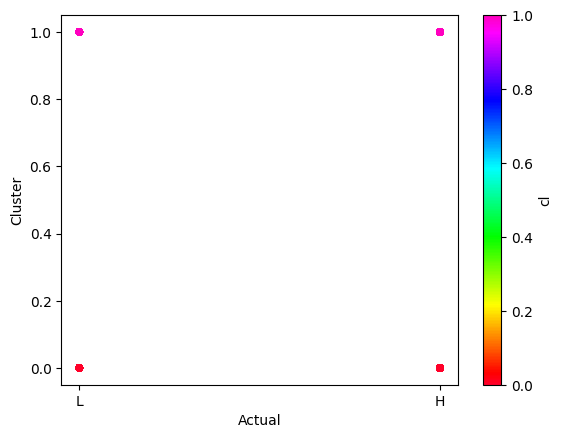

In [158]:
df_cluster['cl'] = kmeans.labels_
df_cluster.plot.scatter('Actual', 'Cluster', c='cl', colormap='gist_rainbow')